Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columns in the dataset: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']

First 5 rows of the dataset:
    StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1        

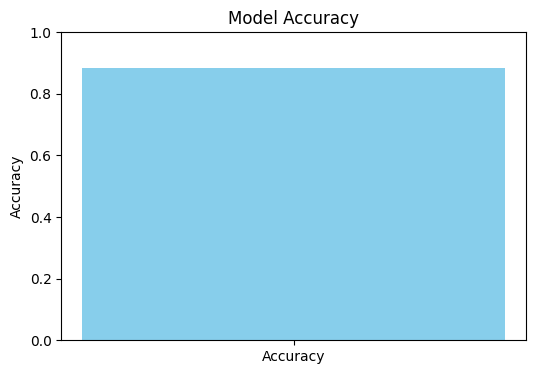

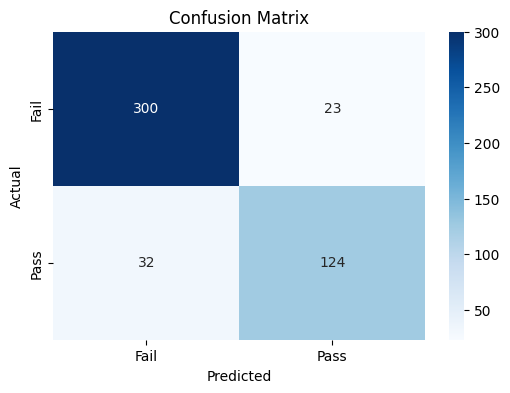

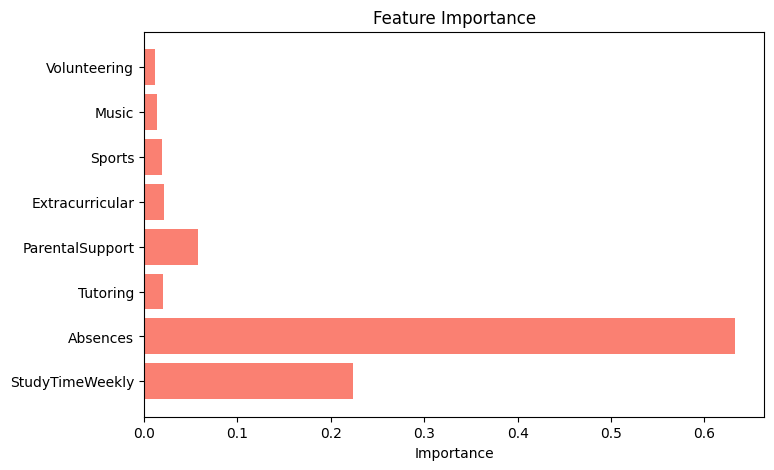

In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Mount Drive to load the dataset
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Load the Dataset
file_path = "/content/drive/MyDrive/8. Student Performance Prediction.csv"
df = pd.read_csv(file_path)

# Step 4: Show columns and first few rows to inspect the dataset
print("Columns in the dataset:", df.columns.tolist())
print("\nFirst 5 rows of the dataset:\n", df.head())

# Step 5: Create a Pass/Fail column based on GradeClass
df['Pass/Fail'] = df['GradeClass'].apply(lambda x: 'Pass' if x in [0, 1, 2] else 'Fail')

# Step 6: Select relevant features for prediction
features = ['StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
            'Extracurricular', 'Sports', 'Music', 'Volunteering']
X = df[features]  # Features (inputs)
y = df['Pass/Fail']  # Target variable

# Step 7: Encode target variable (Pass/Fail) to numerical values
y_encoded = y.map({'Pass': 1, 'Fail': 0})

# Step 8: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 9: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 10: Train the Random Forest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 11: Make predictions using the test set
y_pred = model.predict(X_test)

# Step 12: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 13: Show predictions for the first 20 students (Pass/Fail predictions)
results_df = pd.DataFrame({
    'Student_ID': df['StudentID'][:20].values,  # Assuming there's a StudentID column
    'Predicted': y_pred[:20],  # Only show predictions for the first 20 students
    'Predicted_Label': pd.Series(y_pred[:20]).map({1: 'Pass', 0: 'Fail'})
})

# Step 14: Organize the output into a table for easy viewing
print("\nPass/Fail Predictions for the first 20 students:")

# Display the results as a neat table
print("\n", results_df.to_string(index=False))

# Step 15: Save the predictions to a CSV file
full_results_path = "/content/drive/MyDrive/student_predictions.csv"
results_df.to_csv(full_results_path, index=False)
print("\nPredictions saved to CSV:", full_results_path)

# Step 16: Visualizations
# Accuracy Score Bar Plot
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Bar Chart
feature_importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importances, color='salmon')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()
